In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

In [4]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [21]:
len(df)

14723

In [5]:
ga_df = df[df['State'] == 'GA']
atl_df = ga_df[df['Metro'] == 'Atlanta']
atl_df.head()

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
28,71067,30349,Riverdale,GA,Atlanta,Clayton,29,90900.0,91100.0,91200.0,...,118700,119900,121400,122900,123800,124600,126200,127300,127700,128100
42,70829,30044,Lawrenceville,GA,Atlanta,Gwinnett,43,111400.0,111800.0,112200.0,...,169500,170900,172800,174700,176400,178500,180100,181000,182200,183400
51,70828,30043,Lawrenceville,GA,Atlanta,Gwinnett,52,135200.0,135500.0,135800.0,...,213600,216000,218400,220300,221900,223700,225500,226700,227800,228800
65,70874,30096,Duluth,GA,Atlanta,Gwinnett,66,119700.0,120000.0,120300.0,...,205900,207600,209400,211200,212700,214600,216500,218100,219800,221100
78,70810,30024,Suwanee,GA,Atlanta,Gwinnett,79,179600.0,181000.0,182400.0,...,330100,331700,333400,334800,336100,338600,341300,343200,344900,346300


In [6]:
atl_df = atl_df[df['City'] == 'Atlanta']

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [7]:
atl_df.reset_index(inplace=True)

In [8]:
atl_df

,index,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,227,71050,30331,Atlanta,GA,Atlanta,Fulton,228,97100.0,97700.0,...,130300,131300,132700,134000,135100,137000,139400,140800,141500,141600
1,1097,71029,30309,Atlanta,GA,Atlanta,Fulton,1098,260400.0,261700.0,...,780200,785900,797400,807600,813500,819200,824900,834500,850300,860700
2,1223,71043,30324,Atlanta,GA,Atlanta,Fulton,1224,189400.0,190800.0,...,506500,509600,515100,519600,523900,528500,532600,537900,543700,545700
3,1758,71036,30316,Atlanta,GA,Atlanta,Fulton,1759,62300.0,62300.0,...,240900,244200,247900,251700,255300,258800,261600,264300,268700,272500
4,1787,71025,30305,Atlanta,GA,Atlanta,Fulton,1788,297200.0,299000.0,...,860000,863400,868200,871200,872400,876800,885600,892900,897600,898200
5,2757,71028,30308,Atlanta,GA,Atlanta,Fulton,2758,138700.0,139400.0,...,524200,529000,539200,547200,557000,570500,581000,585900,594000,599300
6,3261,71026,30306,Atlanta,GA,Atlanta,Fulton,3262,223100.0,225200.0,...,733900,737500,744700,751200,755000,760300,766600,773200,781700,787000
7,4455,71046,30327,Atlanta,GA,Atlanta,Fulton,4456,515500.0,515900.0,...,1135600,1140900,1152100,1158400,1158000,1162000,1173000,1173200,1168400,1165700
8,4643,71027,30307,Atlanta,GA,Atlanta,Fulton,4644,158900.0,159700.0,...,539700,542300,544000,547600,554300,563200,569700,575400,582900,587100
9,6650,71037,30317,Atlanta,GA,Atlanta,Fulton,6651,51800.0,52500.0,...,362500,362500,362300,366000,372400,379200,384900,388400,390400,391600


In [9]:
zipcodes = []
zipcode_dfs = []
for idx,zipcode in zip(atl_df.index, atl_df['RegionName']):
    zipcodes.append(zipcode)
    zipcode_df = atl_df.drop(['index', 'RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
    zipcode_dfs.append(zipcode_df.iloc[idx])

In [10]:
for zipcode_df in zipcode_dfs:
    zipcode_df.index = pd.DatetimeIndex(zipcode_df.index, freq='infer')

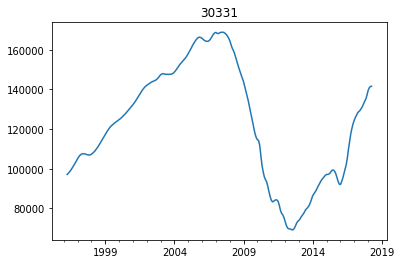

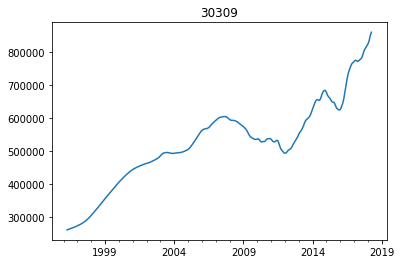

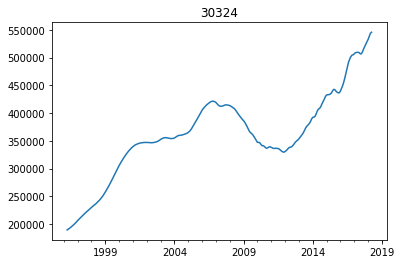

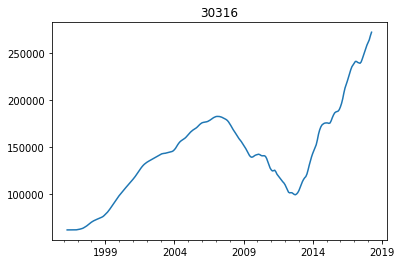

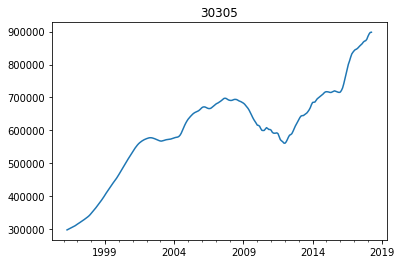

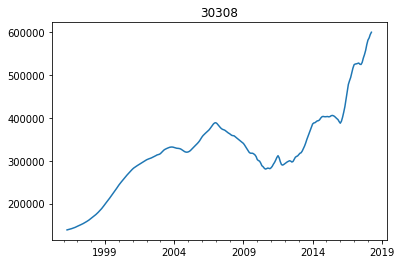

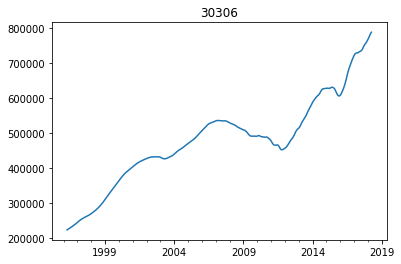

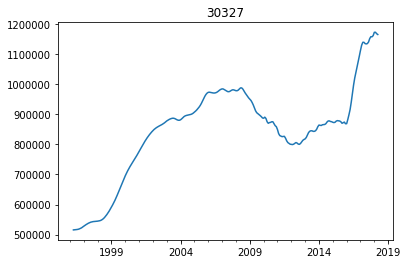

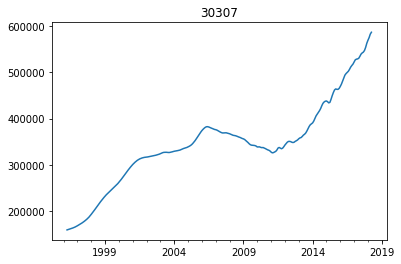

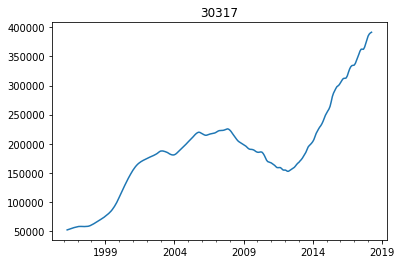

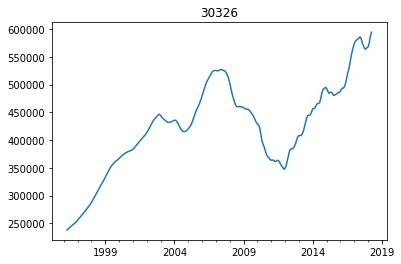

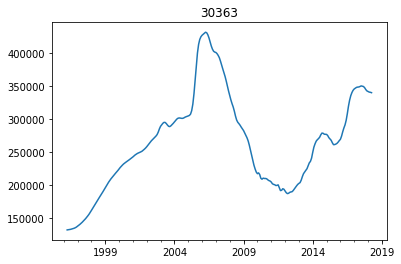

In [11]:
for df_,name in zip(zipcode_dfs,zipcodes):
    df_.plot()
    plt.title(name)
    plt.show()

# ARIMA

In [69]:
from statsmodels.tsa.stattools import adfuller
for zipcode, df in zip(zipcodes,zipcode_dfs):
    results = adfuller(df)
    print(zipcode, 'ADF Statistic:', results[0], 'p-value:', results[1])

30331 ADF Statistic: -2.9477747502215954 p-value: 0.04006785087118662
30309 ADF Statistic: -0.4411319231487451 p-value: 0.9030014036472613
30324 ADF Statistic: -1.4464957943781531 p-value: 0.5597938244069627
30316 ADF Statistic: -0.7238449491906733 p-value: 0.840476108452398
30305 ADF Statistic: -1.5342317892157724 p-value: 0.5165145552458383
30308 ADF Statistic: -0.7554173308008462 p-value: 0.8318685291300493
30306 ADF Statistic: -0.6268247194393572 p-value: 0.8648048164240433
30327 ADF Statistic: -1.820924573521693 p-value: 0.3701238160405416
30307 ADF Statistic: 0.07694226294474998 p-value: 0.9644511157587934
30317 ADF Statistic: -0.6202779858540075 p-value: 0.866333887565417
30326 ADF Statistic: -1.5281994600858215 p-value: 0.5195182257113418
30363 ADF Statistic: -2.4138273987001453 p-value: 0.13787169972260455


In [80]:
zipcode_dfs_test = [test_values(df) for df in zipcode_dfs]
zipcode_dfs_test

[2017-01-01    124500.0
 2017-02-01    125900.0
 2017-03-01    127000.0
 2017-04-01    128200.0
 2017-05-01    128900.0
 2017-06-01    129400.0
 2017-07-01    130300.0
 2017-08-01    131300.0
 2017-09-01    132700.0
 2017-10-01    134000.0
 2017-11-01    135100.0
 2017-12-01    137000.0
 2018-01-01    139400.0
 2018-02-01    140800.0
 2018-03-01    141500.0
 2018-04-01    141600.0
 Name: 0, dtype: float64, 2017-01-01    772400.0
 2017-02-01    775700.0
 2017-03-01    774700.0
 2017-04-01    772000.0
 2017-05-01    773800.0
 2017-06-01    777600.0
 2017-07-01    780200.0
 2017-08-01    785900.0
 2017-09-01    797400.0
 2017-10-01    807600.0
 2017-11-01    813500.0
 2017-12-01    819200.0
 2018-01-01    824900.0
 2018-02-01    834500.0
 2018-03-01    850300.0
 2018-04-01    860700.0
 Name: 1, dtype: float64, 2017-01-01    506800.0
 2017-02-01    508800.0
 2017-03-01    509300.0
 2017-04-01    509500.0
 2017-05-01    509300.0
 2017-06-01    507300.0
 2017-07-01    506500.0
 2017-08-01   

In [21]:
for zipcode, df in zip(zipcodes, zipcode_dfs):
    df.name = zipcode

In [79]:
def test_values(series):
    test_series = series.copy()[series.index.year >= 2017]
    return test_series

In [77]:
test_values(zipcode_dfs[0])

2017-01-01    124500.0
2017-02-01    125900.0
2017-03-01    127000.0
2017-04-01    128200.0
2017-05-01    128900.0
2017-06-01    129400.0
2017-07-01    130300.0
2017-08-01    131300.0
2017-09-01    132700.0
2017-10-01    134000.0
2017-11-01    135100.0
2017-12-01    137000.0
2018-01-01    139400.0
2018-02-01    140800.0
2018-03-01    141500.0
2018-04-01    141600.0
Name: 0, dtype: float64


In [85]:
zipcode_dfs_test

[2017-01-01    124500.0
 2017-02-01    125900.0
 2017-03-01    127000.0
 2017-04-01    128200.0
 2017-05-01    128900.0
 2017-06-01    129400.0
 2017-07-01    130300.0
 2017-08-01    131300.0
 2017-09-01    132700.0
 2017-10-01    134000.0
 2017-11-01    135100.0
 2017-12-01    137000.0
 2018-01-01    139400.0
 2018-02-01    140800.0
 2018-03-01    141500.0
 2018-04-01    141600.0
 Name: 30331, dtype: float64, 2017-01-01    772400.0
 2017-02-01    775700.0
 2017-03-01    774700.0
 2017-04-01    772000.0
 2017-05-01    773800.0
 2017-06-01    777600.0
 2017-07-01    780200.0
 2017-08-01    785900.0
 2017-09-01    797400.0
 2017-10-01    807600.0
 2017-11-01    813500.0
 2017-12-01    819200.0
 2018-01-01    824900.0
 2018-02-01    834500.0
 2018-03-01    850300.0
 2018-04-01    860700.0
 Name: 30309, dtype: float64, 2017-01-01    506800.0
 2017-02-01    508800.0
 2017-03-01    509300.0
 2017-04-01    509500.0
 2017-05-01    509300.0
 2017-06-01    507300.0
 2017-07-01    506500.0
 2017-

In [83]:
zipcodes

[30331,
 30309,
 30324,
 30316,
 30305,
 30308,
 30306,
 30327,
 30307,
 30317,
 30326,
 30363]

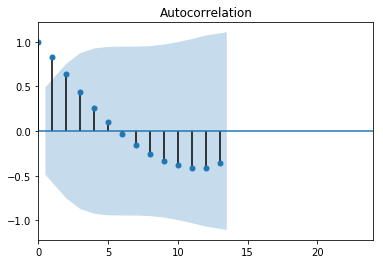

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


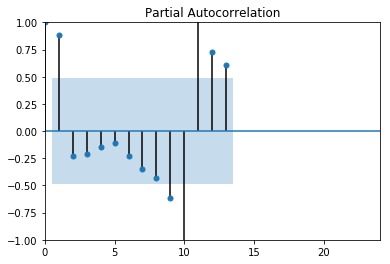

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(zipcode_dfs_test[0]); plt.xlim(0,24); plt.show()
plot_pacf(zipcode_dfs_test[0]); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

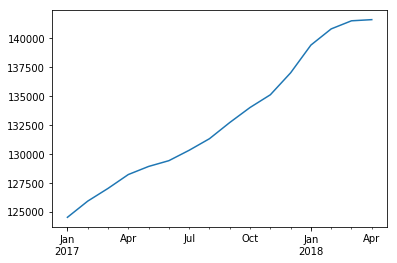

In [99]:
zipcode_dfs_test[0].rolling(window=1).mean().plot()

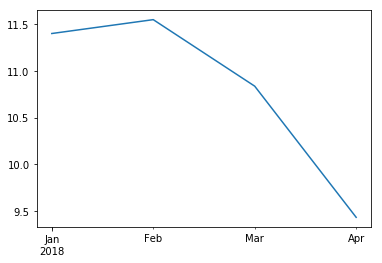

In [114]:
time_series_transformed = np.sqrt(zipcode_dfs_test[0]) - np.sqrt(zipcode_dfs_test[0]).rolling(window=13).mean()
time_series_transformed.plot()

In [115]:
print(adfuller(time_series_transformed.bfill()))

(-22.042736265678958, 0.0, 1, 14, {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, -24.006748613296978)


In [31]:
zipcode_dfs

[1996-04-01     97100.0
 1996-05-01     97700.0
 1996-06-01     98400.0
 1996-07-01     99100.0
 1996-08-01    100000.0
 1996-09-01    100900.0
 1996-10-01    101900.0
 1996-11-01    102900.0
 1996-12-01    104000.0
 1997-01-01    105000.0
 1997-02-01    106000.0
 1997-03-01    106700.0
 1997-04-01    107200.0
 1997-05-01    107500.0
 1997-06-01    107600.0
 1997-07-01    107500.0
 1997-08-01    107400.0
 1997-09-01    107100.0
 1997-10-01    107000.0
 1997-11-01    106900.0
 1997-12-01    107000.0
 1998-01-01    107300.0
 1998-02-01    107800.0
 1998-03-01    108300.0
 1998-04-01    108900.0
 1998-05-01    109700.0
 1998-06-01    110500.0
 1998-07-01    111300.0
 1998-08-01    112300.0
 1998-09-01    113300.0
                 ...   
 2015-11-01     93600.0
 2015-12-01     92200.0
 2016-01-01     92000.0
 2016-02-01     93400.0
 2016-03-01     95100.0
 2016-04-01     97300.0
 2016-05-01     99400.0
 2016-06-01    101900.0
 2016-07-01    105300.0
 2016-08-01    109900.0
 2016-09-01    1

In [152]:
zipcode_dfs_train = []
for df in zipcode_dfs:
    zipcode_dfs_train.append(df[df.index.year < 2017])

In [153]:
for df in zipcode_dfs_train:
    print(df.index.freq)

<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>
<MonthBegin>


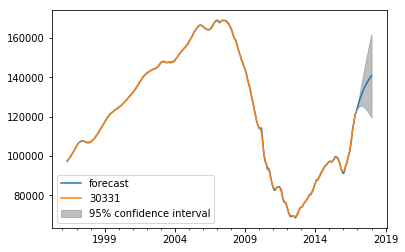

AIC: 3649.8715865894924
BIC: 3663.9253015741524
ARIMA Model not able to be fit
ARIMA Model not able to be fit


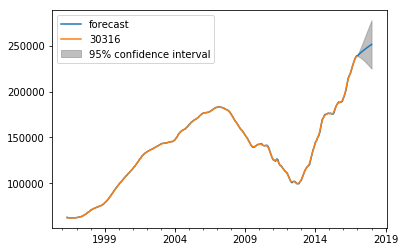

AIC: 3704.3929407021756
BIC: 3718.4466556868356


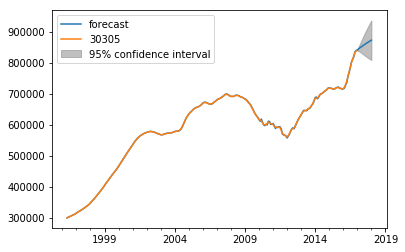

AIC: 4278.310320036457
BIC: 4292.364035021116


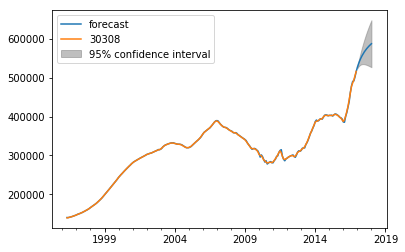

AIC: 4272.0619436701945
BIC: 4286.115658654854


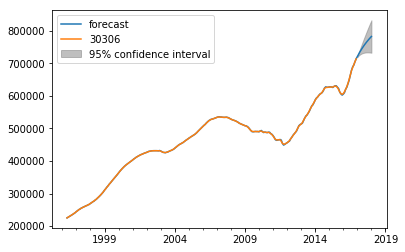

AIC: 4015.2545388386184
BIC: 4029.3082538232784


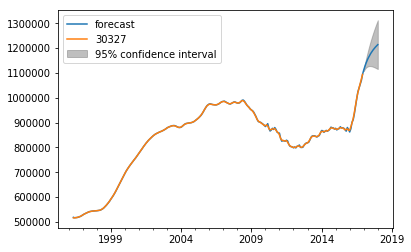

AIC: 4464.35736579157
BIC: 4478.41108077623


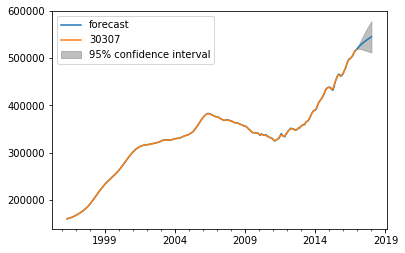

AIC: 3951.7751439406507
BIC: 3965.8288589253107


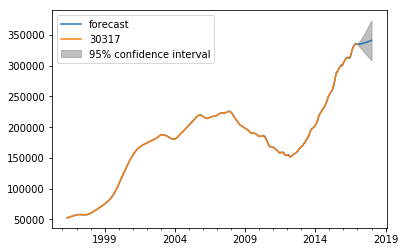

AIC: 3845.654212820212
BIC: 3859.707927804872


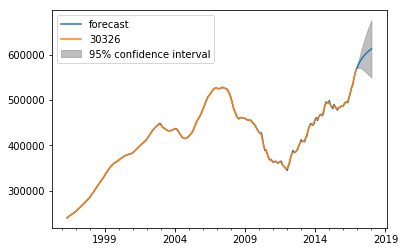

AIC: 4345.843609608458
BIC: 4359.897324593117


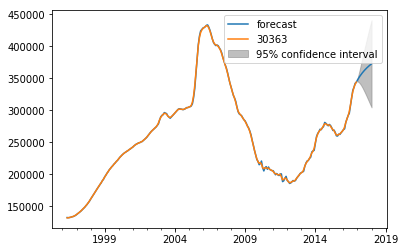

AIC: 4206.783648106626
BIC: 4220.837363091286


In [69]:
for zipcode in zipcode_dfs_train:
    try:
        arima_model = ARIMA(zipcode, order=(1,1,1)).fit()
    except:
        print("ARIMA Model not able to be fit")
        continue
    arima_model.plot_predict(1, len(zipcode)+12); plt.show()
    print('AIC:', arima_model.aic)
    print('BIC:', arima_model.bic)

In [42]:
type(zipcode_dfs_train[0][0])

numpy.float64

In [51]:
arima_model = ARIMA(zipcode_dfs_train[0], order=(1,1,1)).fit()

In [154]:
for df in zipcode_dfs_train:
    df.name = str(df.name)

In [48]:
zipcode_dfs_train[0].name

'30331'

In [52]:
from sklearn.metrics import mean_squared_error

In [62]:
forecast = arima_model.forecast(steps=12)[0]
actual = zipcode_dfs[0][zipcode_dfs[0].index.year == 2017]
print(forecast, actual)

[124933.69145061 126974.33046011 128840.2494944  130548.04014886
 132112.71846326 133547.8745382  134865.80794381 136077.65026993
 137193.47603872 138222.40308498 139172.68340417 140051.78537345] 2017-01-01    124500.0
2017-02-01    125900.0
2017-03-01    127000.0
2017-04-01    128200.0
2017-05-01    128900.0
2017-06-01    129400.0
2017-07-01    130300.0
2017-08-01    131300.0
2017-09-01    132700.0
2017-10-01    134000.0
2017-11-01    135100.0
2017-12-01    137000.0
Freq: MS, Name: 30331, dtype: float64


In [63]:
print('Forecast MSE:', mean_squared_error(actual, forecast))

Forecast MSE: 12113434.261939803


In [66]:
zipcode_dfs_train

[1996-04-01     97100.0
 1996-05-01     97700.0
 1996-06-01     98400.0
 1996-07-01     99100.0
 1996-08-01    100000.0
 1996-09-01    100900.0
 1996-10-01    101900.0
 1996-11-01    102900.0
 1996-12-01    104000.0
 1997-01-01    105000.0
 1997-02-01    106000.0
 1997-03-01    106700.0
 1997-04-01    107200.0
 1997-05-01    107500.0
 1997-06-01    107600.0
 1997-07-01    107500.0
 1997-08-01    107400.0
 1997-09-01    107100.0
 1997-10-01    107000.0
 1997-11-01    106900.0
 1997-12-01    107000.0
 1998-01-01    107300.0
 1998-02-01    107800.0
 1998-03-01    108300.0
 1998-04-01    108900.0
 1998-05-01    109700.0
 1998-06-01    110500.0
 1998-07-01    111300.0
 1998-08-01    112300.0
 1998-09-01    113300.0
                 ...   
 2014-07-01     92600.0
 2014-08-01     93700.0
 2014-09-01     94600.0
 2014-10-01     95300.0
 2014-11-01     96000.0
 2014-12-01     96700.0
 2015-01-01     97100.0
 2015-02-01     97100.0
 2015-03-01     97300.0
 2015-04-01     97800.0
 2015-05-01     

In [70]:
!pip install pyramid-arima
from pyramid.arima import auto_arima

pmdarima 1.5.2 has requirement scipy>=1.3, but you'll have scipy 1.1.0 which is incompatible.
notebook 6.0.2 has requirement jupyter-client>=5.3.4, but you'll have jupyter-client 5.3.3 which is incompatible.
notebook 6.0.2 has requirement jupyter-core>=4.6.0, but you'll have jupyter-core 4.4.0 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [72]:
fit_arima_models = []
for df in zipcode_dfs_train:
    print('Zipcode:', df.name)
    model = auto_arima(df, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
    fit_arima_models.append(model)

Zipcode: 30331
Fit ARIMA: order=(2, 2, 2); AIC=3623.976, BIC=3645.032, Fit time=0.268 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3717.839, BIC=3724.858, Fit time=0.015 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3669.101, BIC=3679.629, Fit time=0.069 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3642.362, BIC=3652.891, Fit time=0.054 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds


/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(3, 2, 2); AIC=3625.973, BIC=3650.538, Fit time=0.453 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3624.128, BIC=3641.675, Fit time=0.321 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1); AIC=3642.579, BIC=3656.617, Fit time=0.338 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3605.913, BIC=3633.988, Fit time=0.649 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3604.315, BIC=3635.900, Fit time=0.864 seconds
Fit ARIMA: order=(4, 2, 2); AIC=3617.055, BIC=3645.131, Fit time=0.600 seconds
Fit ARIMA: order=(4, 2, 4); AIC=nan, BIC=nan, Fit time=0.569 seconds
Fit ARIMA: order=(5, 2, 4); AIC=3602.691, BIC=3641.294, Fit time=0.967 seconds
Fit ARIMA: order=(5, 2, 3); AIC=3602.195, BIC=3637.289, Fit time=0.760 seconds
Fit ARIMA: order=(5, 2, 2); AIC=3600.762, BIC=3632.346, Fit time=0.695 seconds
Fit ARIMA: order=(4, 2, 1); AIC=3624.089, BIC=3648.655, Fit time=0.276 seconds
Fit ARIMA: order=(5, 2, 1); AIC=3614.100, BIC=3642.175, Fit time=0.561 sec

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(0, 1, 0); AIC=4869.054, BIC=4876.081, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4437.672, BIC=4448.212, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 1); AIC=4564.574, BIC=4575.115, Fit time=0.112 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4250.439, BIC=4268.006, Fit time=0.368 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4233.059, BIC=4257.653, Fit time=0.249 seconds
Fit ARIMA: order=(3, 1, 1); AIC=4271.070, BIC=4292.150, Fit time=0.165 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4232.144, BIC=4260.251, Fit time=0.860 seconds
Fit ARIMA: order=(4, 1, 4); AIC=4235.757, BIC=4270.891, Fit time=1.871 seconds
Fit ARIMA: order=(2, 1, 3); AIC=4238.734, BIC=4263.328, Fit time=0.639 seconds
Fit ARIMA: order=(4, 1, 3); AIC=4233.953, BIC=4265.573, Fit time=0.473 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4228.536, BIC=4260.157, Fit time=1.066 seconds
Fit ARIMA: order=(4, 1, 5); AIC=4227.041, BIC=4265.689, Fit time=2.251 seconds
Fit ARIMA: order=(3, 1, 5); AIC=4225.185, BIC=4260.3

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(0, 2, 1); AIC=3918.235, BIC=3928.763, Fit time=0.115 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=3874.814, BIC=3899.380, Fit time=0.423 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3889.558, BIC=3907.105, Fit time=0.269 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3872.827, BIC=3897.392, Fit time=0.314 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3869.937, BIC=3901.521, Fit time=0.773 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3870.401, BIC=3898.477, Fit time=1.151 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3869.959, BIC=3905.053, Fit time=1.181 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3867.857, BIC=3895.932, Fit time=0.747 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3869.857, BIC=3901.441, Fit time=0.580 seconds
Total fit time: 6.041 seconds
Zipcode: 30316
Fit ARIMA: order=(2, 2, 2); AIC=3678.992, BIC=3700.049, Fit time=0.203 seconds
Fit ARIMA: order=(0, 2, 0); AIC=3819.055, BIC=3826.074, Fit time=0.005 seconds
Fit ARIMA: order=(1

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(1, 2, 2); AIC=3691.892, BIC=3709.439, Fit time=0.251 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3680.374, BIC=3704.940, Fit time=0.314 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3688.852, BIC=3706.399, Fit time=0.097 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3677.248, BIC=3701.814, Fit time=0.220 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3680.035, BIC=3711.620, Fit time=0.642 seconds
Fit ARIMA: order=(1, 2, 3); AIC=3680.623, BIC=3701.679, Fit time=0.402 seconds
Fit ARIMA: order=(3, 2, 3); AIC=3679.236, BIC=3707.312, Fit time=0.635 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3679.225, BIC=3707.300, Fit time=0.500 seconds
Total fit time: 3.349 seconds
Zipcode: 30305
Fit ARIMA: order=(2, 2, 2); AIC=4213.866, BIC=4234.922, Fit time=0.524 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4359.369, BIC=4366.388, Fit time=0.004 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4339.889, BIC=4350.417, Fit time=0.032 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4279.326, BIC=4289.854, Fit time=0.092 seconds


/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(1, 2, 2); AIC=4264.426, BIC=4281.973, Fit time=0.322 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4214.446, BIC=4239.012, Fit time=0.767 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4259.572, BIC=4277.119, Fit time=0.118 seconds
Fit ARIMA: order=(2, 2, 3); AIC=4214.332, BIC=4238.898, Fit time=0.669 seconds
Fit ARIMA: order=(1, 2, 1); AIC=4278.498, BIC=4292.536, Fit time=0.211 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4206.824, BIC=4234.899, Fit time=0.720 seconds
Fit ARIMA: order=(4, 2, 3); AIC=4208.721, BIC=4240.306, Fit time=0.946 seconds
Fit ARIMA: order=(3, 2, 4); AIC=4208.739, BIC=4240.324, Fit time=1.090 seconds
Fit ARIMA: order=(4, 2, 4); AIC=4210.652, BIC=4245.746, Fit time=1.314 seconds
Total fit time: 6.818 seconds
Zipcode: 30308
Fit ARIMA: order=(2, 1, 2); AIC=4216.351, BIC=4237.432, Fit time=0.404 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4765.861, BIC=4772.888, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4350.028, BIC=4360.568, Fit time=0.100 seconds


/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(0, 1, 1); AIC=4504.769, BIC=4515.310, Fit time=0.140 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4250.128, BIC=4267.695, Fit time=0.454 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4214.407, BIC=4239.001, Fit time=0.387 seconds
Fit ARIMA: order=(3, 1, 1); AIC=4261.123, BIC=4282.204, Fit time=0.271 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4214.913, BIC=4243.021, Fit time=0.432 seconds
Fit ARIMA: order=(2, 1, 1); AIC=4271.032, BIC=4288.599, Fit time=0.284 seconds
Fit ARIMA: order=(4, 1, 3); AIC=4215.932, BIC=4247.552, Fit time=0.452 seconds
Fit ARIMA: order=(4, 1, 2); AIC=4213.934, BIC=4242.042, Fit time=0.632 seconds
Fit ARIMA: order=(4, 1, 1); AIC=4257.460, BIC=4282.054, Fit time=0.334 seconds
Fit ARIMA: order=(5, 1, 3); AIC=4217.754, BIC=4252.889, Fit time=1.086 seconds
Fit ARIMA: order=(5, 1, 2); AIC=4215.925, BIC=4247.546, Fit time=0.825 seconds
Total fit time: 5.816 seconds
Zipcode: 30306
Fit ARIMA: order=(2, 1, 2); AIC=3965.274, BIC=3986.354, Fit time=0.476 seconds
Fit ARI

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(0, 1, 1); AIC=4405.417, BIC=4415.958, Fit time=0.213 seconds
Fit ARIMA: order=(1, 1, 2); AIC=3978.200, BIC=3995.767, Fit time=0.353 seconds
Fit ARIMA: order=(3, 1, 2); AIC=3966.966, BIC=3991.560, Fit time=0.591 seconds
Fit ARIMA: order=(2, 1, 1); AIC=4000.977, BIC=4018.544, Fit time=0.176 seconds
Fit ARIMA: order=(2, 1, 3); AIC=3966.888, BIC=3991.482, Fit time=0.899 seconds
Fit ARIMA: order=(1, 1, 1); AIC=4015.255, BIC=4029.308, Fit time=0.345 seconds
Fit ARIMA: order=(3, 1, 3); AIC=3968.707, BIC=3996.815, Fit time=0.812 seconds
Total fit time: 4.047 seconds
Zipcode: 30327
Fit ARIMA: order=(2, 2, 2); AIC=4366.372, BIC=4387.428, Fit time=0.643 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4539.488, BIC=4546.507, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4522.148, BIC=4532.676, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4459.923, BIC=4470.452, Fit time=0.039 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds


/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(3, 2, 2); AIC=4367.804, BIC=4392.370, Fit time=0.661 seconds
Fit ARIMA: order=(2, 2, 1); AIC=4427.874, BIC=4445.421, Fit time=0.149 seconds
Fit ARIMA: order=(2, 2, 3); AIC=4368.862, BIC=4393.428, Fit time=0.748 seconds
Fit ARIMA: order=(1, 2, 1); AIC=4460.363, BIC=4474.401, Fit time=0.101 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4363.441, BIC=4391.516, Fit time=0.980 seconds
Fit ARIMA: order=(4, 2, 3); AIC=4365.057, BIC=4396.642, Fit time=1.306 seconds
Fit ARIMA: order=(3, 2, 4); AIC=4365.315, BIC=4396.899, Fit time=1.312 seconds
Fit ARIMA: order=(4, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 6.444 seconds
Zipcode: 30307
Fit ARIMA: order=(2, 2, 2); AIC=3908.695, BIC=3929.752, Fit time=0.332 seconds
Fit ARIMA: order=(0, 2, 0); AIC=4074.893, BIC=4081.911, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4020.110, BIC=4030.638, Fit time=0.055 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3954.074, BIC=3964.602, Fit time=0.070 seconds


/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(1, 2, 2); AIC=3934.808, BIC=3952.355, Fit time=0.253 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3910.520, BIC=3935.086, Fit time=0.444 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3932.344, BIC=3949.891, Fit time=0.304 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3886.432, BIC=3910.997, Fit time=0.506 seconds
Fit ARIMA: order=(3, 2, 4); AIC=3882.546, BIC=3914.130, Fit time=0.875 seconds
Fit ARIMA: order=(2, 2, 4); AIC=3888.424, BIC=3916.499, Fit time=0.897 seconds
Fit ARIMA: order=(4, 2, 4); AIC=3872.547, BIC=3907.641, Fit time=1.336 seconds
Fit ARIMA: order=(4, 2, 3); AIC=3889.224, BIC=3920.809, Fit time=0.520 seconds
Fit ARIMA: order=(4, 2, 5); AIC=3858.424, BIC=3897.028, Fit time=2.176 seconds
Fit ARIMA: order=(3, 2, 5); AIC=3856.775, BIC=3891.868, Fit time=1.786 seconds
Fit ARIMA: order=(2, 2, 5); AIC=3855.216, BIC=3886.801, Fit time=1.351 seconds
Fit ARIMA: order=(1, 2, 4); AIC=3888.386, BIC=3912.952, Fit time=0.747 seconds
Fit ARIMA: order=(1, 2, 5); AIC=nan, BIC=nan, Fit ti

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(1, 2, 2); AIC=3832.249, BIC=3849.796, Fit time=0.396 seconds
Fit ARIMA: order=(3, 2, 2); AIC=3802.144, BIC=3826.710, Fit time=0.289 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3807.294, BIC=3824.840, Fit time=0.269 seconds
Fit ARIMA: order=(2, 2, 3); AIC=3777.860, BIC=3802.426, Fit time=0.485 seconds
Fit ARIMA: order=(3, 2, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 3); AIC=3776.801, BIC=3797.858, Fit time=0.345 seconds
Fit ARIMA: order=(1, 2, 4); AIC=3778.414, BIC=3802.980, Fit time=0.462 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 4); AIC=3780.698, BIC=3808.773, Fit time=0.677 seconds
Fit ARIMA: order=(0, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 3.541 seconds
Zipcode: 30326
Fit ARIMA: order=(2, 1, 2); AIC=4272.809, BIC=4293.890, Fit time=0.984 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4803.573, BIC=4810.600, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4402.370, B

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(0, 1, 1); AIC=4554.579, BIC=4565.119, Fit time=0.145 seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=0.264 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4303.287, BIC=4327.881, Fit time=0.537 seconds
Fit ARIMA: order=(2, 1, 1); AIC=4345.988, BIC=4363.555, Fit time=0.188 seconds
Fit ARIMA: order=(2, 1, 3); AIC=4260.924, BIC=4285.518, Fit time=0.684 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4264.398, BIC=4296.019, Fit time=1.220 seconds
Fit ARIMA: order=(1, 1, 3); AIC=4263.909, BIC=4284.990, Fit time=0.474 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4262.547, BIC=4290.654, Fit time=0.762 seconds
Fit ARIMA: order=(2, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 5.361 seconds
Zipcode: 30363
Fit ARIMA: order=(2, 1, 2); AIC=4153.728, BIC=4174.808, Fit time=0.478 seconds
Fit ARIMA: order=(0, 1, 0); AIC=4854.472, BIC=4861.499, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=4336.412, BIC=4346.953, Fit time=0.142 seconds


/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

Fit ARIMA: order=(0, 1, 1); AIC=4549.838, BIC=4560.378, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 2); AIC=4181.096, BIC=4198.663, Fit time=0.187 seconds
Fit ARIMA: order=(3, 1, 2); AIC=4148.231, BIC=4172.825, Fit time=0.802 seconds
Fit ARIMA: order=(3, 1, 1); AIC=4197.350, BIC=4218.431, Fit time=0.141 seconds
Fit ARIMA: order=(3, 1, 3); AIC=4147.983, BIC=4176.090, Fit time=0.552 seconds
Fit ARIMA: order=(4, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 3); AIC=4151.192, BIC=4175.786, Fit time=0.284 seconds
Fit ARIMA: order=(4, 1, 3); AIC=4149.744, BIC=4181.365, Fit time=0.631 seconds
Fit ARIMA: order=(3, 1, 4); AIC=4149.585, BIC=4181.206, Fit time=0.621 seconds
Total fit time: 3.946 seconds


In [73]:
fit_arima_models

[ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(5, 2, 2),
       out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
       solver='lbfgs', start_params=None, suppress_warnings=True,
       transparams=True, trend='c'),
 ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 5),
       out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
       solver='lbfgs', start_params=None, suppress_warnings=True,
       transparams=True, trend='c'),
 ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 2, 3),
       out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
       solver='lbfgs', start_params=None, suppress_warnings=True,
       transparams=True, trend='c'),
 ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 3),
       out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
       solver='lbfgs', start_params=None, suppress_warnings=True,
       tr

In [75]:
for model, zipcode in zip(fit_arima_models, zipcode_dfs_train):
    model.plot_predict(1, len(zipcode)+12); plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_predict'

In [78]:
for model in fit_arima_models:
    print(model.params())

[ 8.97140722 -0.73786489 -0.3303188  -0.20351841 -0.30926646 -0.27302944
  1.40504585  0.75582153]
[ 2.04999935e+03  1.72317051e+00 -1.54572807e+00  6.51168200e-01
  1.91346810e-01  5.55144180e-02  5.65534276e-01  6.33456764e-01
 -3.57410314e-01]
[-1.1122197   0.49860853  0.01385831  0.32015287  0.40602362 -0.73296872
 -0.67281439]
[ 7.14994862  1.30838659 -0.79844622 -0.54994802 -0.17841602  0.37552844]
[-0.0310734   0.07515737  0.27851748  0.39955455  0.68871797 -0.68871797
 -1.        ]
[1.75784061e+03 1.31506372e-01 3.59199225e-01 1.12696904e-01
 1.09569695e-01 1.56434607e+00 8.89609477e-01]
[2.13554605e+03 4.36305763e-01 3.79603596e-01 1.54467851e+00
 8.02819934e-01]
[ 5.97218389e+01  2.49407934e-01 -5.63291487e-02  4.15914352e-01
  5.55799262e-01 -4.85928771e-01 -7.99001352e-01]
[13.77324626  1.11832471 -0.84029248 -0.37438434 -0.2311993   0.47007276
  0.29118735 -0.74909411]
[ 4.96663772  0.25011817  0.59294859 -0.3598306  -0.57990709]
[ 1.32302496e+03  7.13060047e-01  1.8957871

In [140]:
print(fit_arima_models[0].predict(n_periods=12))

[125066.25441425 127998.46664576 130978.80562327 134149.1671703
 137189.86656108 140086.15960021 142949.35901871 145864.76257774
 148795.79010899 151810.4464172  154822.87690181 157824.64074158]


# Linear Regression

Zipcode: 30331
Zipcode: 30309
Zipcode: 30324
Zipcode: 30316
Zipcode: 30305
Zipcode: 30308
Zipcode: 30306
Zipcode: 30327
Zipcode: 30307
Zipcode: 30317
Zipcode: 30326
Zipcode: 30363


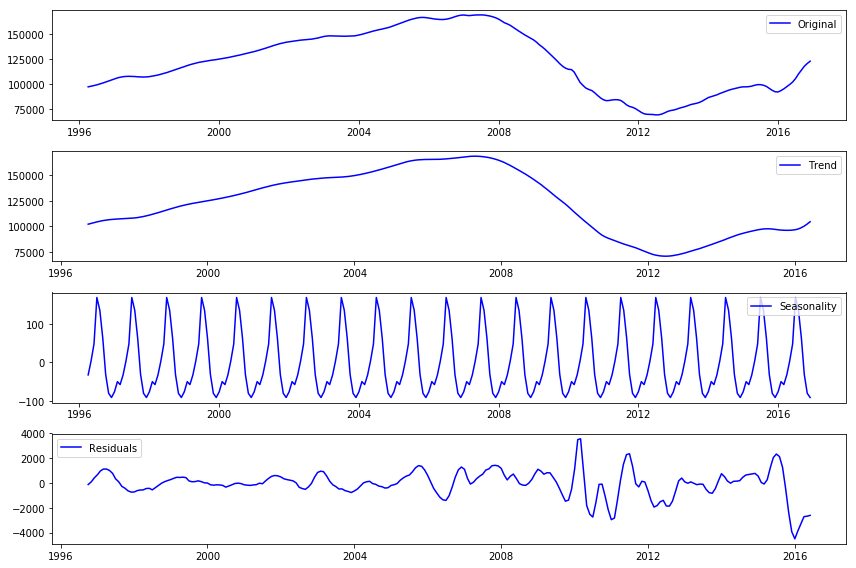

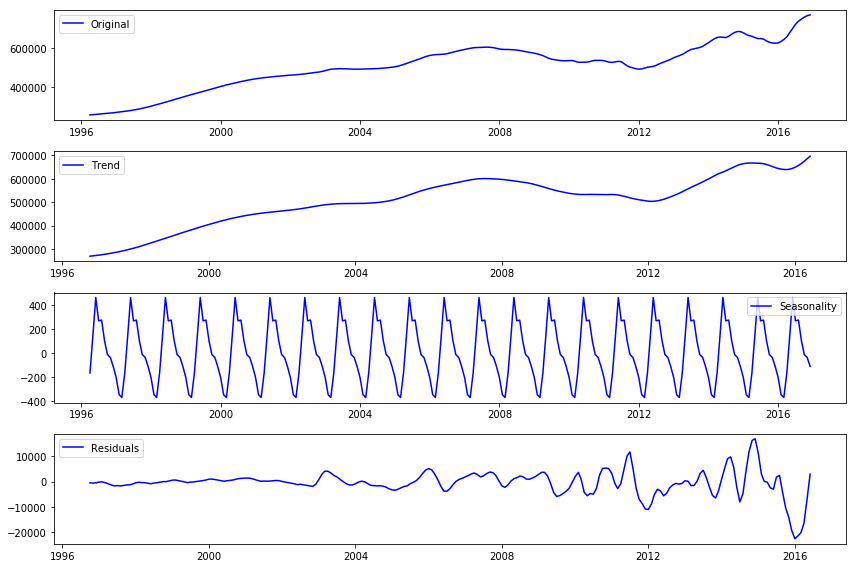

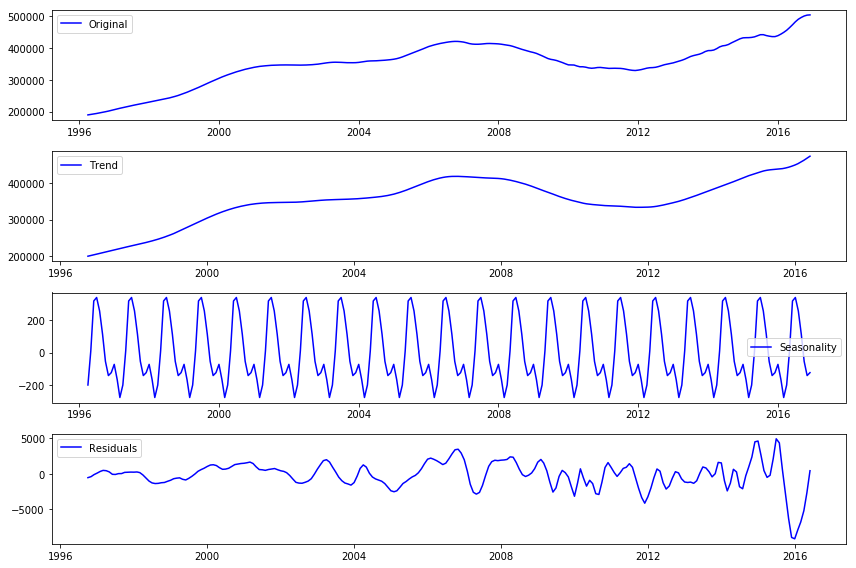

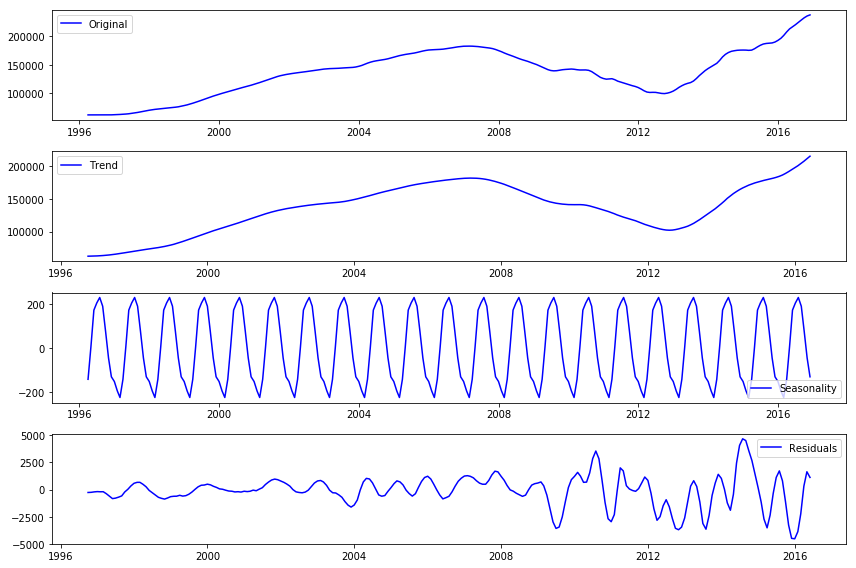

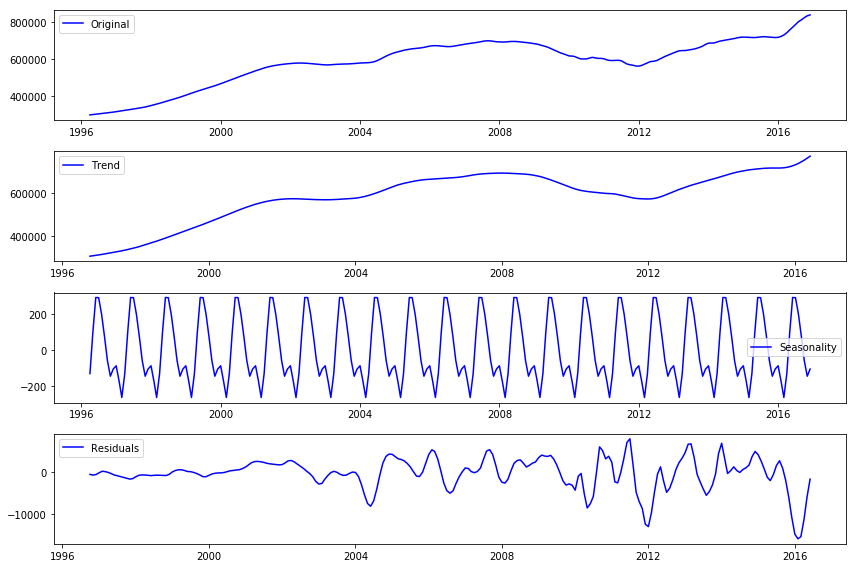

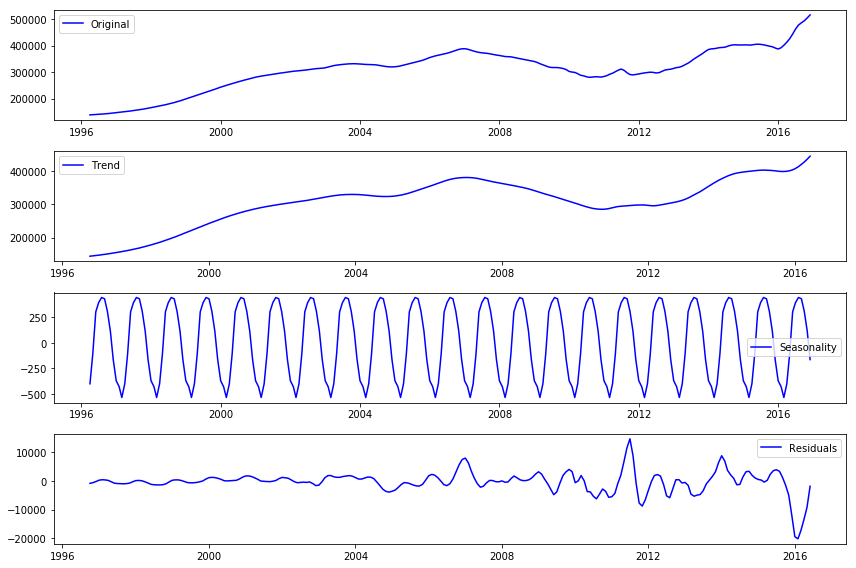

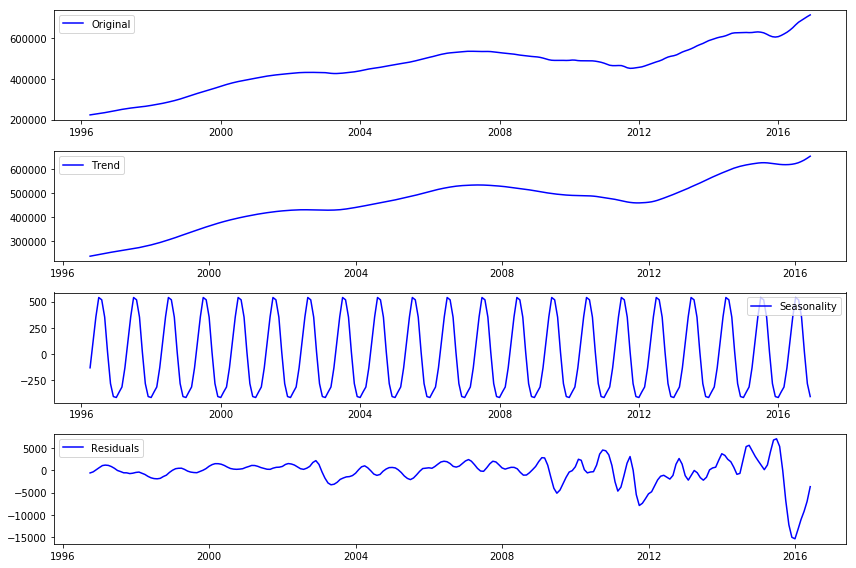

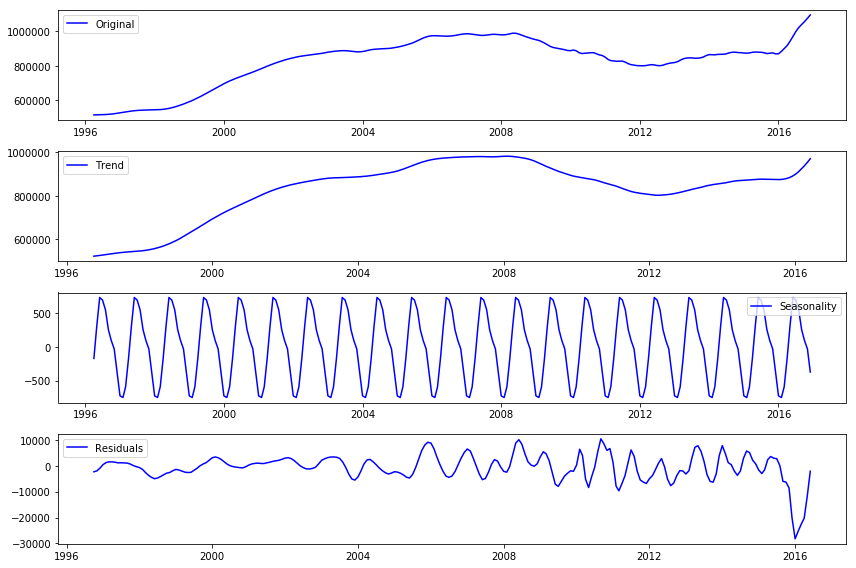

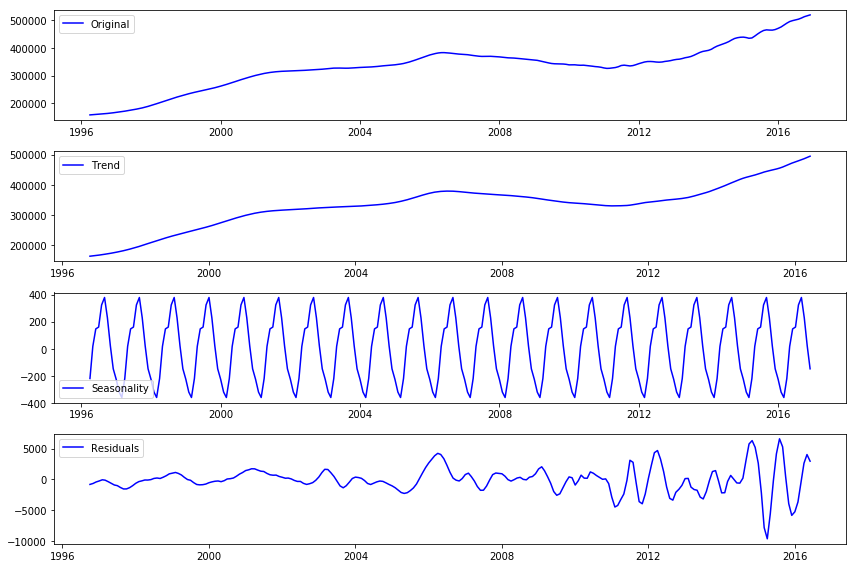

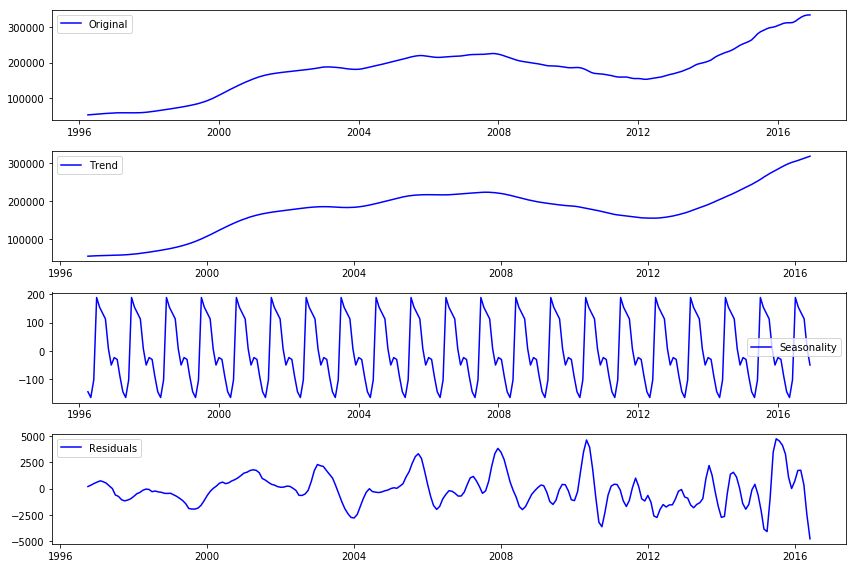

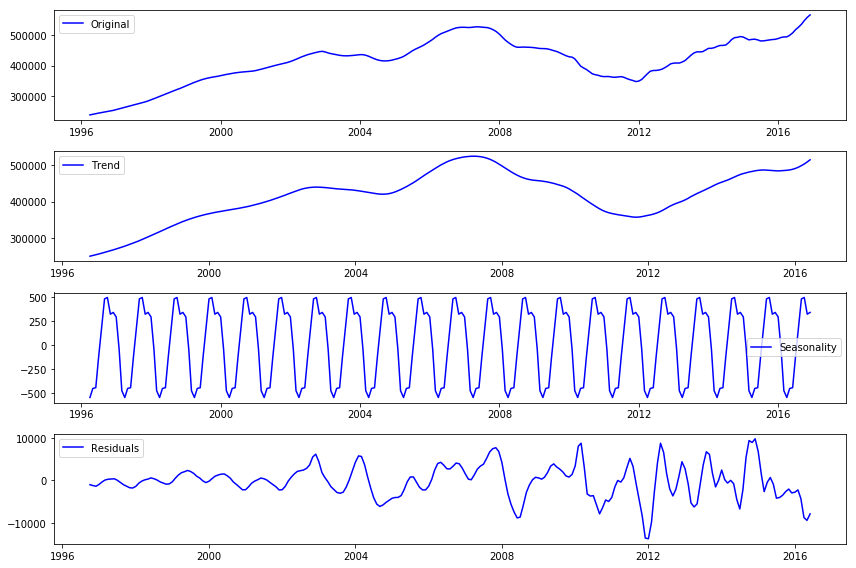

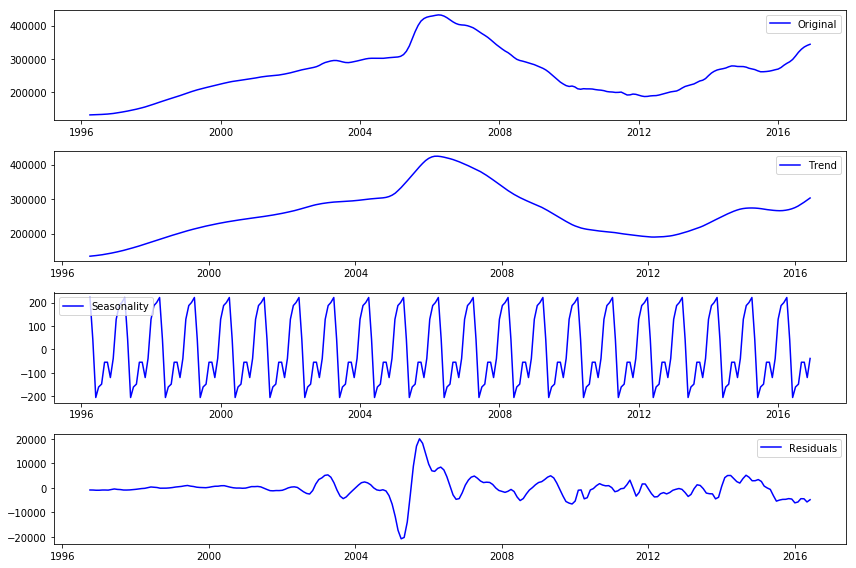

In [79]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
for df in zipcode_dfs_train:
    decomposition = seasonal_decompose(df)
# Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
# Plot gathered statistics
    print('Zipcode:', df.name)
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(df, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

In [63]:
def generate_poly_feats(data):
    if isinstance(data, pd.Series):
        df_dict = {"Values": data, "Year": data.index.year - np.min(np.array(data.index.year))}
        df = pd.DataFrame(df_dict)
    else:
        df = data
        df['Year'] = df.index.year - np.min(np.array(df.index.year))
    df['Month'] = df.index.month
    date_features = ['Year', 'Month']
    polynomial_terms = [2,3]
    for feature in date_features:
        for i in polynomial_terms:
            df[feature+'**'+str(i)] = df[feature]**i
    previous_values_range = 12
    for i in range(1,previous_values_range):
        df['Previous'+str(i)] = df['Values'].shift(i).bfill()
        for j in polynomial_terms:
            df['Previous'+str(i)+'**'+str(j)] = (df['Values'].shift(i).bfill())**j
    print(df.head())
    return df

In [155]:
zipcode_dfs_train = [generate_poly_feats(series) for series in zipcode_dfs_train]

              Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
1996-04-01   97100.0     0      4        0        0        16        64   
1996-05-01   97700.0     0      5        0        0        25       125   
1996-06-01   98400.0     0      6        0        0        36       216   
1996-07-01   99100.0     0      7        0        0        49       343   
1996-08-01  100000.0     0      8        0        0        64       512   

            Previous1  Previous1**2  Previous1**3      ...        \
1996-04-01    97100.0  9.428410e+09  9.154986e+14      ...         
1996-05-01    97100.0  9.428410e+09  9.154986e+14      ...         
1996-06-01    97700.0  9.545290e+09  9.325748e+14      ...         
1996-07-01    98400.0  9.682560e+09  9.527639e+14      ...         
1996-08-01    99100.0  9.820810e+09  9.732423e+14      ...         

            Previous8**3  Previous9  Previous9**2  Previous9**3  Previous10  \
1996-04-01  9.154986e+14    97100.0  9.428410e+09  9.154986e+

              Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
1996-04-01  223100.0     0      4        0        0        16        64   
1996-05-01  225200.0     0      5        0        0        25       125   
1996-06-01  227400.0     0      6        0        0        36       216   
1996-07-01  229600.0     0      7        0        0        49       343   
1996-08-01  231800.0     0      8        0        0        64       512   

            Previous1  Previous1**2  Previous1**3      ...        \
1996-04-01   223100.0  4.977361e+10  1.110449e+16      ...         
1996-05-01   223100.0  4.977361e+10  1.110449e+16      ...         
1996-06-01   225200.0  5.071504e+10  1.142103e+16      ...         
1996-07-01   227400.0  5.171076e+10  1.175903e+16      ...         
1996-08-01   229600.0  5.271616e+10  1.210363e+16      ...         

            Previous8**3  Previous9  Previous9**2  Previous9**3  Previous10  \
1996-04-01  1.110449e+16   223100.0  4.977361e+10  1.110449e+

In [156]:
zipcode_dfs_train[0]

,Values,Year,Month,Year**2,Year**3,Month**2,Month**3,Previous1,Previous1**2,Previous1**3,...,Previous8**3,Previous9,Previous9**2,Previous9**3,Previous10,Previous10**2,Previous10**3,Previous11,Previous11**2,Previous11**3
1996-04-01,97100.0,0,4,0,0,16,64,97100.0,9.428410e+09,9.154986e+14,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1996-05-01,97700.0,0,5,0,0,25,125,97100.0,9.428410e+09,9.154986e+14,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1996-06-01,98400.0,0,6,0,0,36,216,97700.0,9.545290e+09,9.325748e+14,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1996-07-01,99100.0,0,7,0,0,49,343,98400.0,9.682560e+09,9.527639e+14,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1996-08-01,100000.0,0,8,0,0,64,512,99100.0,9.820810e+09,9.732423e+14,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1996-09-01,100900.0,0,9,0,0,81,729,100000.0,1.000000e+10,1.000000e+15,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1996-10-01,101900.0,0,10,0,0,100,1000,100900.0,1.018081e+10,1.027244e+15,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1996-11-01,102900.0,0,11,0,0,121,1331,101900.0,1.038361e+10,1.058090e+15,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1996-12-01,104000.0,0,12,0,0,144,1728,102900.0,1.058841e+10,1.089547e+15,...,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14
1997-01-01,105000.0,1,1,1,1,1,1,104000.0,1.081600e+10,1.124864e+15,...,9.325748e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14


In [99]:
zipcode_dfs_train[0] = zipcode_dfs_train[0].drop('Year')

In [102]:
zipcode_dfs_train[2]

1996-04-01    189400.0
1996-05-01    190800.0
1996-06-01    192300.0
1996-07-01    193900.0
1996-08-01    195700.0
1996-09-01    197500.0
1996-10-01    199400.0
1996-11-01    201400.0
1996-12-01    203700.0
1997-01-01    206000.0
1997-02-01    208200.0
1997-03-01    210300.0
1997-04-01    212400.0
1997-05-01    214500.0
1997-06-01    216500.0
1997-07-01    218500.0
1997-08-01    220500.0
1997-09-01    222300.0
1997-10-01    224200.0
1997-11-01    226000.0
1997-12-01    227900.0
1998-01-01    229800.0
1998-02-01    231600.0
1998-03-01    233300.0
1998-04-01    235000.0
1998-05-01    236800.0
1998-06-01    238800.0
1998-07-01    240800.0
1998-08-01    243000.0
1998-09-01    245400.0
                ...   
2014-07-01    408600.0
2014-08-01    411600.0
2014-09-01    416600.0
2014-10-01    420800.0
2014-11-01    424900.0
2014-12-01    429700.0
2015-01-01    432600.0
2015-02-01    433100.0
2015-03-01    433200.0
2015-04-01    434000.0
2015-05-01    435700.0
2015-06-01    439100.0
2015-07-01 

In [103]:
pd.DataFrame(zipcode_dfs_train[0])

,30331
1996-04-01,97100
1996-05-01,97700
1996-06-01,98400
1996-07-01,99100
1996-08-01,100000
1996-09-01,100900
1996-10-01,101900
1996-11-01,102900
1996-12-01,104000
1997-01-01,105000


In [106]:
df_dict = {"Values": zipcode_dfs_train[0], "Year": zipcode_dfs_train[0].index.year - np.min(np.array(zipcode_dfs_train[0].index.year))}
pd.DataFrame(df_dict)

,Values,Year
1996-04-01,97100,0
1996-05-01,97700,0
1996-06-01,98400,0
1996-07-01,99100,0
1996-08-01,100000,0
1996-09-01,100900,0
1996-10-01,101900,0
1996-11-01,102900,0
1996-12-01,104000,0
1997-01-01,105000,1


In [118]:
zipcode_dfs_train[0]

1996-04-01     97100
1996-05-01     97700
1996-06-01     98400
1996-07-01     99100
1996-08-01    100000
1996-09-01    100900
1996-10-01    101900
1996-11-01    102900
1996-12-01    104000
1997-01-01    105000
1997-02-01    106000
1997-03-01    106700
1997-04-01    107200
1997-05-01    107500
1997-06-01    107600
1997-07-01    107500
1997-08-01    107400
1997-09-01    107100
1997-10-01    107000
1997-11-01    106900
1997-12-01    107000
1998-01-01    107300
1998-02-01    107800
1998-03-01    108300
1998-04-01    108900
1998-05-01    109700
1998-06-01    110500
1998-07-01    111300
1998-08-01    112300
1998-09-01    113300
               ...  
2014-07-01     92600
2014-08-01     93700
2014-09-01     94600
2014-10-01     95300
2014-11-01     96000
2014-12-01     96700
2015-01-01     97100
2015-02-01     97100
2015-03-01     97300
2015-04-01     97800
2015-05-01     98700
2015-06-01     99300
2015-07-01     99300
2015-08-01     98700
2015-09-01     97500
2015-10-01     95600
2015-11-01   

In [12]:
from sklearn.linear_model import LassoLarsCV

In [157]:
linear_reg_models = []
for df in zipcode_dfs_train:
    reg = LassoLarsCV(cv=5).fit(df.drop('Values',axis=1), df['Values'])
    linear_reg_models.append(reg)

In [158]:
linear_reg_models

[LassoLarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16, fit_intercept=True,
             max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
             positive=False, precompute='auto', verbose=False),
 LassoLarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16, fit_intercept=True,
             max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
             positive=False, precompute='auto', verbose=False),
 LassoLarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16, fit_intercept=True,
             max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
             positive=False, precompute='auto', verbose=False),
 LassoLarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16, fit_intercept=True,
             max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
             positive=False, precompute='auto', verbose=False),
 LassoLarsCV(copy_X=True, cv=5, eps=2.220446049250313e-16, fit_intercept=True,
             max_iter=500, max_n_alphas=1000, n_j

In [141]:
forecasts = []
for zipcode in zipcode_dfs:
    forecasts.append(zipcode[zipcode.index.year == 2017])
forecasts

[2017-01-01    124500.0
 2017-02-01    125900.0
 2017-03-01    127000.0
 2017-04-01    128200.0
 2017-05-01    128900.0
 2017-06-01    129400.0
 2017-07-01    130300.0
 2017-08-01    131300.0
 2017-09-01    132700.0
 2017-10-01    134000.0
 2017-11-01    135100.0
 2017-12-01    137000.0
 Freq: MS, Name: 30331, dtype: float64, 2017-01-01    772400.0
 2017-02-01    775700.0
 2017-03-01    774700.0
 2017-04-01    772000.0
 2017-05-01    773800.0
 2017-06-01    777600.0
 2017-07-01    780200.0
 2017-08-01    785900.0
 2017-09-01    797400.0
 2017-10-01    807600.0
 2017-11-01    813500.0
 2017-12-01    819200.0
 Freq: MS, Name: 30309, dtype: float64, 2017-01-01    506800.0
 2017-02-01    508800.0
 2017-03-01    509300.0
 2017-04-01    509500.0
 2017-05-01    509300.0
 2017-06-01    507300.0
 2017-07-01    506500.0
 2017-08-01    509600.0
 2017-09-01    515100.0
 2017-10-01    519600.0
 2017-11-01    523900.0
 2017-12-01    528500.0
 Freq: MS, Name: 30324, dtype: float64, 2017-01-01    2398

In [164]:
arima_results = []
lars_results = []
date_features = ['Year', 'Month']
polynomial_terms = [2,3]
for actual, actual_lin, arima, lars in zip(forecasts, forecasts_lin_reg, fit_arima_models, linear_reg_models):
    arima_forecast = arima.predict(n_periods=12)
    print('Zipcode:', actual.name)
    print('Forecast ARIMA MSE:', mean_squared_error(actual, arima_forecast))
    arima_results.append(mean_squared_error(actual, arima_forecast))
    lars_forecast = reg.predict(actual_lin.drop(['Values'], axis=1))
    print('Forecast LARS MSE:', mean_squared_error(actual, lars_forecast))
    lars_results.append(mean_squared_error(actual, lars_forecast))

Zipcode: 30331
Forecast ARIMA MSE: 167495514.4814218
Forecast LARS MSE: 174999.54402481802
Zipcode: 30309
Forecast ARIMA MSE: 120817635.77505565
Forecast LARS MSE: 408909603.77961206
Zipcode: 30324
Forecast ARIMA MSE: 23245980.858599428
Forecast LARS MSE: 12710478.013866616
Zipcode: 30316
Forecast ARIMA MSE: 24636145.18359228
Forecast LARS MSE: 1707005.8954484097
Zipcode: 30305
Forecast ARIMA MSE: 101966967.42163526
Forecast LARS MSE: 475893265.24572515
Zipcode: 30308
Forecast ARIMA MSE: 650423150.5116252
Forecast LARS MSE: 35393292.39806148
Zipcode: 30306
Forecast ARIMA MSE: 144048043.05408648
Forecast LARS MSE: 204380840.89302313
Zipcode: 30327
Forecast ARIMA MSE: 6906197512.088734
Forecast LARS MSE: 7429823891.381482
Zipcode: 30307
Forecast ARIMA MSE: 28042608.86734198
Forecast LARS MSE: 27658571.29097487
Zipcode: 30317
Forecast ARIMA MSE: 207516943.86979592
Forecast LARS MSE: 3536007.8255386422
Zipcode: 30326
Forecast ARIMA MSE: 2206376354.8973136
Forecast LARS MSE: 36483170.255140

In [159]:
forecasts_lin_reg = [generate_poly_feats(series) for series in forecasts]

              Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
2017-01-01  124500.0     0      1        0        0         1         1   
2017-02-01  125900.0     0      2        0        0         4         8   
2017-03-01  127000.0     0      3        0        0         9        27   
2017-04-01  128200.0     0      4        0        0        16        64   
2017-05-01  128900.0     0      5        0        0        25       125   

            Previous1  Previous1**2  Previous1**3      ...        \
2017-01-01   124500.0  1.550025e+10  1.929781e+15      ...         
2017-02-01   124500.0  1.550025e+10  1.929781e+15      ...         
2017-03-01   125900.0  1.585081e+10  1.995617e+15      ...         
2017-04-01   127000.0  1.612900e+10  2.048383e+15      ...         
2017-05-01   128200.0  1.643524e+10  2.106998e+15      ...         

            Previous8**3  Previous9  Previous9**2  Previous9**3  Previous10  \
2017-01-01  1.929781e+15   124500.0  1.550025e+10  1.929781e+

               Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
2017-01-01  1112900.0     0      1        0        0         1         1   
2017-02-01  1129900.0     0      2        0        0         4         8   
2017-03-01  1139700.0     0      3        0        0         9        27   
2017-04-01  1139800.0     0      4        0        0        16        64   
2017-05-01  1135400.0     0      5        0        0        25       125   

            Previous1  Previous1**2  Previous1**3      ...        \
2017-01-01  1112900.0  1.238546e+12  1.378378e+18      ...         
2017-02-01  1112900.0  1.238546e+12  1.378378e+18      ...         
2017-03-01  1129900.0  1.276674e+12  1.442514e+18      ...         
2017-04-01  1139700.0  1.298916e+12  1.480375e+18      ...         
2017-05-01  1139800.0  1.299144e+12  1.480764e+18      ...         

            Previous8**3  Previous9  Previous9**2  Previous9**3  Previous10  \
2017-01-01  1.378378e+18  1112900.0  1.238546e+12  1.37

In [165]:
results_df = pd.DataFrame({'ARIMA': arima_results, 'LASSO': lars_results})
results_df

,ARIMA,LASSO
0,1.674955e+08,1.749995e+05
1,1.208176e+08,4.089096e+08
2,2.324598e+07,1.271048e+07
3,2.463615e+07,1.707006e+06
4,1.019670e+08,4.758933e+08
5,6.504232e+08,3.539329e+07
6,1.440480e+08,2.043808e+08
7,6.906198e+09,7.429824e+09
8,2.804261e+07,2.765857e+07
9,2.075169e+08,3.536008e+06


# 5 Best ZIP Codes

In [161]:
zipcode_dfs_forecast = [zipcode.append(pd.DataFrame(index=zipcode[-12:].index + pd.DateOffset(months=12)), sort=False) for zipcode in zipcode_dfs if zipcode.name not in [30309, 30305, 30306, 30327]]
zipcode_dfs_forecast

[              Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
 1996-04-01   97100.0   0.0    4.0      0.0      0.0      16.0      64.0   
 1996-05-01   97700.0   0.0    5.0      0.0      0.0      25.0     125.0   
 1996-06-01   98400.0   0.0    6.0      0.0      0.0      36.0     216.0   
 1996-07-01   99100.0   0.0    7.0      0.0      0.0      49.0     343.0   
 1996-08-01  100000.0   0.0    8.0      0.0      0.0      64.0     512.0   
 1996-09-01  100900.0   0.0    9.0      0.0      0.0      81.0     729.0   
 1996-10-01  101900.0   0.0   10.0      0.0      0.0     100.0    1000.0   
 1996-11-01  102900.0   0.0   11.0      0.0      0.0     121.0    1331.0   
 1996-12-01  104000.0   0.0   12.0      0.0      0.0     144.0    1728.0   
 1997-01-01  105000.0   1.0    1.0      1.0      1.0       1.0       1.0   
 1997-02-01  106000.0   1.0    2.0      1.0      1.0       4.0       8.0   
 1997-03-01  106700.0   1.0    3.0      1.0      1.0       9.0      27.0   
 1997-04-01 

In [162]:
zipcode_dfs_forecast = [generate_poly_feats(series) for series in zipcode_dfs_forecast]

              Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
1996-04-01   97100.0     0      4        0        0        16        64   
1996-05-01   97700.0     0      5        0        0        25       125   
1996-06-01   98400.0     0      6        0        0        36       216   
1996-07-01   99100.0     0      7        0        0        49       343   
1996-08-01  100000.0     0      8        0        0        64       512   

            Previous1  Previous1**2  Previous1**3      ...        \
1996-04-01    97100.0  9.428410e+09  9.154986e+14      ...         
1996-05-01    97100.0  9.428410e+09  9.154986e+14      ...         
1996-06-01    97700.0  9.545290e+09  9.325748e+14      ...         
1996-07-01    98400.0  9.682560e+09  9.527639e+14      ...         
1996-08-01    99100.0  9.820810e+09  9.732423e+14      ...         

            Previous8**3  Previous9  Previous9**2  Previous9**3  Previous10  \
1996-04-01  9.154986e+14    97100.0  9.428410e+09  9.154986e+

             Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
1996-04-01  51800.0     0      4        0        0        16        64   
1996-05-01  52500.0     0      5        0        0        25       125   
1996-06-01  53200.0     0      6        0        0        36       216   
1996-07-01  53900.0     0      7        0        0        49       343   
1996-08-01  54500.0     0      8        0        0        64       512   

            Previous1  Previous1**2  Previous1**3      ...        \
1996-04-01    51800.0  2.683240e+09  1.389918e+14      ...         
1996-05-01    51800.0  2.683240e+09  1.389918e+14      ...         
1996-06-01    52500.0  2.756250e+09  1.447031e+14      ...         
1996-07-01    53200.0  2.830240e+09  1.505688e+14      ...         
1996-08-01    53900.0  2.905210e+09  1.565908e+14      ...         

            Previous8**3  Previous9  Previous9**2  Previous9**3  Previous10  \
1996-04-01  1.389918e+14    51800.0  2.683240e+09  1.389918e+14    

In [30]:
linear_reg_models = []
for df in zipcode_dfs:
    reg = LassoLarsCV(cv=5).fit(df.drop('Values',axis=1), df['Values'])
    linear_reg_models.append(reg)

In [27]:
zipcodes

[30331,
 30309,
 30324,
 30316,
 30305,
 30308,
 30306,
 30327,
 30307,
 30317,
 30326,
 30363]

[              Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
 1996-04-01  260400.0     0      4        0        0        16        64   
 1996-05-01  261700.0     0      5        0        0        25       125   
 1996-06-01  262900.0     0      6        0        0        36       216   
 1996-07-01  264200.0     0      7        0        0        49       343   
 1996-08-01  265400.0     0      8        0        0        64       512   
 1996-09-01  266700.0     0      9        0        0        81       729   
 1996-10-01  268100.0     0     10        0        0       100      1000   
 1996-11-01  269500.0     0     11        0        0       121      1331   
 1996-12-01  271100.0     0     12        0        0       144      1728   
 1997-01-01  273000.0     1      1        1        1         1         1   
 1997-02-01  274700.0     1      2        1        1         4         8   
 1997-03-01  276300.0     1      3        1        1         9        27   
 1997-04-01 

In [29]:
len(zipcode_dfs_forecast)

8

In [53]:
for zipcode in zipcode_dfs_forecast[0:1]:
    new_dates = zipcode[-12:].index + pd.DateOffset(months=12)
    zipcode = zipcode.append(pd.DataFrame(index=new_dates), sort=False)
    #print(zipcode)
    zipcode['Year'] = zipcode.index.year - np.min(np.array(zipcode.index.year))
    zipcode['Month'] = zipcode.index.month
    date_features = ['Year', 'Month']
    polynomial_terms = [2,3]
    for feature in date_features:
        for i in polynomial_terms:
            zipcode[feature+'**'+str(i)] = zipcode[feature]**i
    #print(zipcode)
    previous_values_range = 12
    for i in range(1,previous_values_range):
        zipcode['Previous'+str(i)] = zipcode['Values'].shift(i).bfill()
        for j in polynomial_terms:
            zipcode['Previous'+str(i)+'**'+str(j)] = (zipcode['Values'].shift(i).bfill())**j
    #print(zipcode)

              Values  Year  Month  Year**2  Year**3  Month**2  Month**3  \
1996-04-01   97100.0     0      4        0        0        16        64   
1996-05-01   97700.0     0      5        0        0        25       125   
1996-06-01   98400.0     0      6        0        0        36       216   
1996-07-01   99100.0     0      7        0        0        49       343   
1996-08-01  100000.0     0      8        0        0        64       512   
1996-09-01  100900.0     0      9        0        0        81       729   
1996-10-01  101900.0     0     10        0        0       100      1000   
1996-11-01  102900.0     0     11        0        0       121      1331   
1996-12-01  104000.0     0     12        0        0       144      1728   
1997-01-01  105000.0     1      1        1        1         1         1   
1997-02-01  106000.0     1      2        1        1         4         8   
1997-03-01  106700.0     1      3        1        1         9        27   
1997-04-01  107200.0     

In [35]:
test = zipcode_dfs_forecast[0][-12:].index + pd.DateOffset(months=12)

In [37]:
test_copy = zipcode_dfs_forecast[0].copy()

In [40]:
test_copy.append(pd.DataFrame(index=test))

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Month,Month**2,Month**3,Previous1,Previous1**2,Previous1**3,Previous10,Previous10**2,Previous10**3,Previous11,...,Previous8,Previous8**2,Previous8**3,Previous9,Previous9**2,Previous9**3,Values,Year,Year**2,Year**3
1996-04-01,4.0,16.0,64.0,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,0.0,0.0,0.0
1996-05-01,5.0,25.0,125.0,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,97700.0,0.0,0.0,0.0
1996-06-01,6.0,36.0,216.0,97700.0,9.545290e+09,9.325748e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,98400.0,0.0,0.0,0.0
1996-07-01,7.0,49.0,343.0,98400.0,9.682560e+09,9.527639e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,99100.0,0.0,0.0,0.0
1996-08-01,8.0,64.0,512.0,99100.0,9.820810e+09,9.732423e+14,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,100000.0,0.0,0.0,0.0
1996-09-01,9.0,81.0,729.0,100000.0,1.000000e+10,1.000000e+15,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,100900.0,0.0,0.0,0.0
1996-10-01,10.0,100.0,1000.0,100900.0,1.018081e+10,1.027244e+15,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,101900.0,0.0,0.0,0.0
1996-11-01,11.0,121.0,1331.0,101900.0,1.038361e+10,1.058090e+15,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,102900.0,0.0,0.0,0.0
1996-12-01,12.0,144.0,1728.0,102900.0,1.058841e+10,1.089547e+15,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97100.0,9.428410e+09,9.154986e+14,97100.0,9.428410e+09,9.154986e+14,104000.0,0.0,0.0,0.0
1997-01-01,1.0,1.0,1.0,104000.0,1.081600e+10,1.124864e+15,97100.0,9.428410e+09,9.154986e+14,97100.0,...,97700.0,9.545290e+09,9.325748e+14,97100.0,9.428410e+09,9.154986e+14,105000.0,1.0,1.0,1.0


In [107]:
zipcode_dfs_forecast[0][-12:]

,Values,Year,Month,Year**2,Year**3,Month**2,Month**3,Previous1,Previous1**2,Previous1**3,...,Previous8**3,Previous9,Previous9**2,Previous9**3,Previous10,Previous10**2,Previous10**3,Previous11,Previous11**2,Previous11**3
2018-05-01,141996.764463,22,5,484,10648,25,125,NaN,2.005056e+10,2.839159e+15,...,2.336753e+15,NaN,1.723969e+10,2.263571e+15,NaN,1.697809e+10,2.212245e+15,NaN,NaN,NaN
2018-06-01,NaN,22,6,484,10648,36,216,NaN,NaN,NaN,...,2.406104e+15,132700.0,1.760929e+10,2.336753e+15,131300.0,1.723969e+10,2.263571e+15,130300.0,1.697809e+10,2.212245e+15
2018-07-01,NaN,22,7,484,10648,49,343,NaN,NaN,NaN,...,2.465847e+15,134000.0,1.795600e+10,2.406104e+15,132700.0,1.760929e+10,2.336753e+15,131300.0,1.723969e+10,2.263571e+15
2018-08-01,NaN,22,8,484,10648,64,512,NaN,NaN,NaN,...,2.571353e+15,135100.0,1.825201e+10,2.465847e+15,134000.0,1.795600e+10,2.406104e+15,132700.0,1.760929e+10,2.336753e+15
2018-09-01,NaN,22,9,484,10648,81,729,NaN,NaN,NaN,...,2.708871e+15,137000.0,1.876900e+10,2.571353e+15,135100.0,1.825201e+10,2.465847e+15,134000.0,1.795600e+10,2.406104e+15
2018-10-01,NaN,22,10,484,10648,100,1000,NaN,NaN,NaN,...,2.791309e+15,139400.0,1.943236e+10,2.708871e+15,137000.0,1.876900e+10,2.571353e+15,135100.0,1.825201e+10,2.465847e+15
2018-11-01,NaN,22,11,484,10648,121,1331,NaN,NaN,NaN,...,2.833148e+15,140800.0,1.982464e+10,2.791309e+15,139400.0,1.943236e+10,2.708871e+15,137000.0,1.876900e+10,2.571353e+15
2018-12-01,NaN,22,12,484,10648,144,1728,NaN,NaN,NaN,...,2.839159e+15,141500.0,2.002225e+10,2.833148e+15,140800.0,1.982464e+10,2.791309e+15,139400.0,1.943236e+10,2.708871e+15
2019-01-01,NaN,23,1,529,12167,1,1,NaN,NaN,NaN,...,NaN,141600.0,2.005056e+10,2.839159e+15,141500.0,2.002225e+10,2.833148e+15,140800.0,1.982464e+10,2.791309e+15
2019-02-01,NaN,23,2,529,12167,4,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,141600.0,2.005056e+10,2.839159e+15,141500.0,2.002225e+10,2.833148e+15


In [55]:
zipcode_dfs_forecast = 

,Values,Year,Month,Year**2,Year**3,Month**2,Month**3,Previous1,Previous1**2,Previous1**3,...,Previous8**3,Previous9,Previous9**2,Previous9**3,Previous10,Previous10**2,Previous10**3,Previous11,Previous11**2,Previous11**3
1996-04-01,189400.0,0,4,0,0,16,64,189400.0,3.587236e+10,6.794225e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1996-05-01,190800.0,0,5,0,0,25,125,189400.0,3.587236e+10,6.794225e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1996-06-01,192300.0,0,6,0,0,36,216,190800.0,3.640464e+10,6.946005e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1996-07-01,193900.0,0,7,0,0,49,343,192300.0,3.697929e+10,7.111117e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1996-08-01,195700.0,0,8,0,0,64,512,193900.0,3.759721e+10,7.290099e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1996-09-01,197500.0,0,9,0,0,81,729,195700.0,3.829849e+10,7.495014e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1996-10-01,199400.0,0,10,0,0,100,1000,197500.0,3.900625e+10,7.703734e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1996-11-01,201400.0,0,11,0,0,121,1331,199400.0,3.976036e+10,7.928216e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1996-12-01,203700.0,0,12,0,0,144,1728,201400.0,4.056196e+10,8.169179e+15,...,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15
1997-01-01,206000.0,1,1,1,1,1,1,203700.0,4.149369e+10,8.452265e+15,...,6.946005e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15,189400.0,3.587236e+10,6.794225e+15


In [59]:
test = pd.Series()

In [61]:
isinstance(test, pd.Series)

True

In [170]:
def predict_forecast(df, reg):
    for idx in df[-12:].index:
        #print(idx.date())
        df['Values'][idx.date()] = reg.predict(np.array(df.drop('Values', axis=1).loc[idx.date()]).reshape(1, -1))
        #print(df['Values'].tshift(-1))
        previous_values_range = 12
        next_date = idx + pd.DateOffset(months=1)
        #print(next_date)
        if idx.date() == df.index[-1].date():
            break
        else:
            for i in range(1,previous_values_range):
                prev_date = idx - pd.DateOffset(months=i - 1)
                df['Previous'+str(i)][next_date] = df['Values'][prev_date]
                for j in polynomial_terms:
                    df['Previous'+str(i)+'**'+str(j)][next_date] = df['Values'][prev_date]**j
            #print(df.loc[next_date])

In [167]:
predict_forecast(zipcode_dfs_forecast[0], linear_reg_models[0])

2018-05-01
2018-06-01 00:00:00
Values           1.429824e+05
Year             2.200000e+01
Month            6.000000e+00
Year**2          4.840000e+02
Year**3          1.064800e+04
Month**2         3.600000e+01
Month**3         2.160000e+02
Previous1        1.419968e+05
Previous1**2     2.016308e+10
Previous1**3     2.863092e+15
Previous2        1.416000e+05
Previous2**2     2.005056e+10
Previous2**3     2.839159e+15
Previous3        1.415000e+05
Previous3**2     2.002225e+10
Previous3**3     2.833148e+15
Previous4        1.408000e+05
Previous4**2     1.982464e+10
Previous4**3     2.791309e+15
Previous5        1.394000e+05
Previous5**2     1.943236e+10
Previous5**3     2.708871e+15
Previous6        1.370000e+05
Previous6**2     1.876900e+10
Previous6**3     2.571353e+15
Previous7        1.351000e+05
Previous7**2     1.825201e+10
Previous7**3     2.465847e+15
Previous8        1.340000e+05
Previous8**2     1.795600e+10
Previous8**3     2.406104e+15
Previous9        1.327000e+05
Previous9

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

2018-08-01 00:00:00
Values           1.464259e+05
Year             2.200000e+01
Month            8.000000e+00
Year**2          4.840000e+02
Year**3          1.064800e+04
Month**2         6.400000e+01
Month**3         5.120000e+02
Previous1        1.445337e+05
Previous1**2     2.089000e+10
Previous1**3     3.019309e+15
Previous2        1.429824e+05
Previous2**2     2.044397e+10
Previous2**3     2.923127e+15
Previous3        1.419968e+05
Previous3**2     2.016308e+10
Previous3**3     2.863092e+15
Previous4        1.416000e+05
Previous4**2     2.005056e+10
Previous4**3     2.839159e+15
Previous5        1.415000e+05
Previous5**2     2.002225e+10
Previous5**3     2.833148e+15
Previous6        1.408000e+05
Previous6**2     1.982464e+10
Previous6**3     2.791309e+15
Previous7        1.394000e+05
Previous7**2     1.943236e+10
Previous7**3     2.708871e+15
Previous8        1.370000e+05
Previous8**2     1.876900e+10
Previous8**3     2.571353e+15
Previous9        1.351000e+05
Previous9**2     1.8

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

2018-12-01 00:00:00
Values           1.551004e+05
Year             2.200000e+01
Month            1.200000e+01
Year**2          4.840000e+02
Year**3          1.064800e+04
Month**2         1.440000e+02
Month**3         1.728000e+03
Previous1        1.527279e+05
Previous1**2     2.332581e+10
Previous1**3     3.562503e+15
Previous2        1.505473e+05
Previous2**2     2.266449e+10
Previous2**3     3.412079e+15
Previous3        1.484614e+05
Previous3**2     2.204079e+10
Previous3**3     3.272206e+15
Previous4        1.464259e+05
Previous4**2     2.144056e+10
Previous4**3     3.139454e+15
Previous5        1.445337e+05
Previous5**2     2.089000e+10
Previous5**3     3.019309e+15
Previous6        1.429824e+05
Previous6**2     2.044397e+10
Previous6**3     2.923127e+15
Previous7        1.419968e+05
Previous7**2     2.016308e+10
Previous7**3     2.863092e+15
Previous8        1.416000e+05
Previous8**2     2.005056e+10
Previous8**3     2.839159e+15
Previous9        1.415000e+05
Previous9**2     2.0

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


2019-03-01 00:00:00
Values           1.653451e+05
Year             2.300000e+01
Month            3.000000e+00
Year**2          5.290000e+02
Year**3          1.216700e+04
Month**2         9.000000e+00
Month**3         2.700000e+01
Previous1        1.614220e+05
Previous1**2     2.605707e+10
Previous1**3     4.206185e+15
Previous2        1.579837e+05
Previous2**2     2.495886e+10
Previous2**3     3.943094e+15
Previous3        1.551004e+05
Previous3**2     2.405615e+10
Previous3**3     3.731119e+15
Previous4        1.527279e+05
Previous4**2     2.332581e+10
Previous4**3     3.562503e+15
Previous5        1.505473e+05
Previous5**2     2.266449e+10
Previous5**3     3.412079e+15
Previous6        1.484614e+05
Previous6**2     2.204079e+10
Previous6**3     3.272206e+15
Previous7        1.464259e+05
Previous7**2     2.144056e+10
Previous7**3     3.139454e+15
Previous8        1.445337e+05
Previous8**2     2.089000e+10
Previous8**3     3.019309e+15
Previous9        1.429824e+05
Previous9**2     2.0

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [168]:
zipcode_dfs_forecast[0]

,Values,Year,Month,Year**2,Year**3,Month**2,Month**3,Previous1,Previous1**2,Previous1**3,...,Previous8**3,Previous9,Previous9**2,Previous9**3,Previous10,Previous10**2,Previous10**3,Previous11,Previous11**2,Previous11**3
1996-04-01,97100.000000,0,4,0,0,16,64,97100.000000,9.428410e+09,9.154986e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-05-01,97700.000000,0,5,0,0,25,125,97100.000000,9.428410e+09,9.154986e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-06-01,98400.000000,0,6,0,0,36,216,97700.000000,9.545290e+09,9.325748e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-07-01,99100.000000,0,7,0,0,49,343,98400.000000,9.682560e+09,9.527639e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-08-01,100000.000000,0,8,0,0,64,512,99100.000000,9.820810e+09,9.732423e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-09-01,100900.000000,0,9,0,0,81,729,100000.000000,1.000000e+10,1.000000e+15,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-10-01,101900.000000,0,10,0,0,100,1000,100900.000000,1.018081e+10,1.027244e+15,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-11-01,102900.000000,0,11,0,0,121,1331,101900.000000,1.038361e+10,1.058090e+15,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-12-01,104000.000000,0,12,0,0,144,1728,102900.000000,1.058841e+10,1.089547e+15,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1997-01-01,105000.000000,1,1,1,1,1,1,104000.000000,1.081600e+10,1.124864e+15,...,9.325748e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14


In [171]:
for zipcode, reg in zip(zipcode_dfs_forecast, linear_reg_models):
    predict_forecast(zipcode, reg)

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendanfreeman/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_

In [172]:
zipcode_dfs_forecast[1]

,Values,Year,Month,Year**2,Year**3,Month**2,Month**3,Previous1,Previous1**2,Previous1**3,...,Previous8**3,Previous9,Previous9**2,Previous9**3,Previous10,Previous10**2,Previous10**3,Previous11,Previous11**2,Previous11**3
1996-04-01,189400.000000,0,4,0,0,16,64,189400.000000,3.587236e+10,6.794225e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1996-05-01,190800.000000,0,5,0,0,25,125,189400.000000,3.587236e+10,6.794225e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1996-06-01,192300.000000,0,6,0,0,36,216,190800.000000,3.640464e+10,6.946005e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1996-07-01,193900.000000,0,7,0,0,49,343,192300.000000,3.697929e+10,7.111117e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1996-08-01,195700.000000,0,8,0,0,64,512,193900.000000,3.759721e+10,7.290099e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1996-09-01,197500.000000,0,9,0,0,81,729,195700.000000,3.829849e+10,7.495014e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1996-10-01,199400.000000,0,10,0,0,100,1000,197500.000000,3.900625e+10,7.703734e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1996-11-01,201400.000000,0,11,0,0,121,1331,199400.000000,3.976036e+10,7.928216e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1996-12-01,203700.000000,0,12,0,0,144,1728,201400.000000,4.056196e+10,8.169179e+15,...,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15
1997-01-01,206000.000000,1,1,1,1,1,1,203700.000000,4.149369e+10,8.452265e+15,...,6.946005e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15,189400.000000,3.587236e+10,6.794225e+15


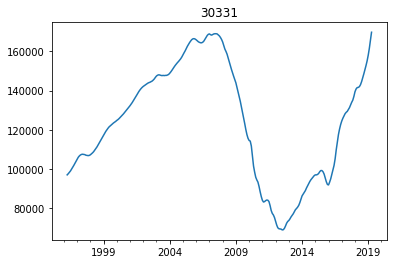

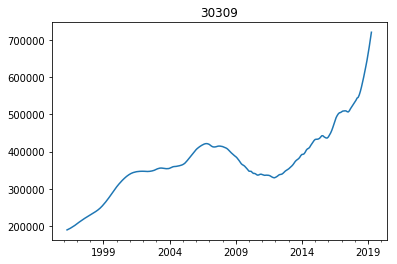

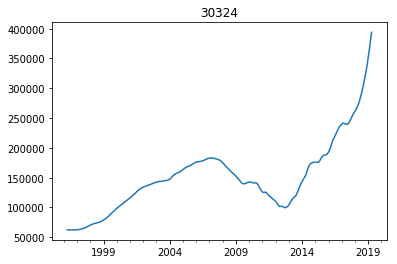

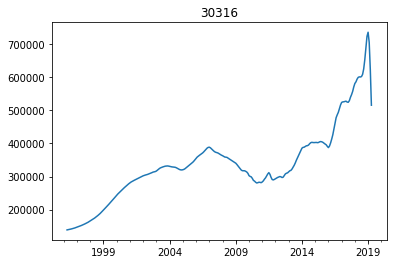

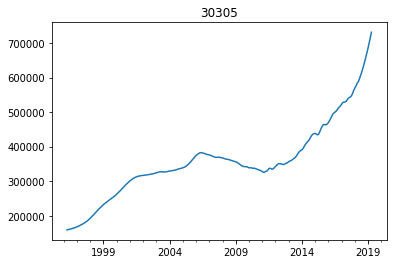

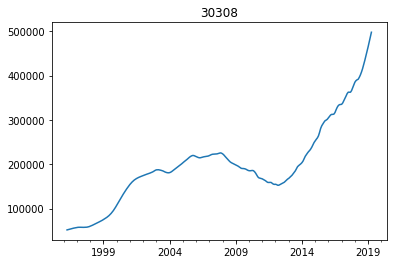

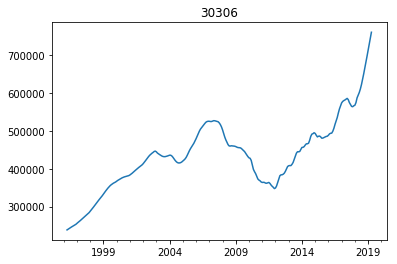

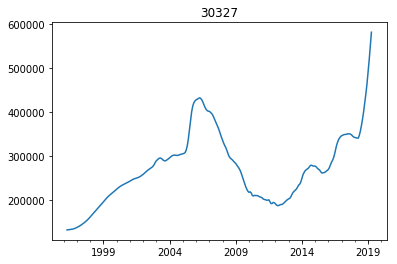

In [184]:
for df_, zipcode in zip(zipcode_dfs_forecast, zipcodes):
    df_['Values'].plot()
    plt.title(zipcode)
    plt.show()

In [175]:
zipcode_dfs_forecast[0]

,Values,Year,Month,Year**2,Year**3,Month**2,Month**3,Previous1,Previous1**2,Previous1**3,...,Previous8**3,Previous9,Previous9**2,Previous9**3,Previous10,Previous10**2,Previous10**3,Previous11,Previous11**2,Previous11**3
1996-04-01,97100.000000,0,4,0,0,16,64,97100.000000,9.428410e+09,9.154986e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-05-01,97700.000000,0,5,0,0,25,125,97100.000000,9.428410e+09,9.154986e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-06-01,98400.000000,0,6,0,0,36,216,97700.000000,9.545290e+09,9.325748e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-07-01,99100.000000,0,7,0,0,49,343,98400.000000,9.682560e+09,9.527639e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-08-01,100000.000000,0,8,0,0,64,512,99100.000000,9.820810e+09,9.732423e+14,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-09-01,100900.000000,0,9,0,0,81,729,100000.000000,1.000000e+10,1.000000e+15,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-10-01,101900.000000,0,10,0,0,100,1000,100900.000000,1.018081e+10,1.027244e+15,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-11-01,102900.000000,0,11,0,0,121,1331,101900.000000,1.038361e+10,1.058090e+15,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1996-12-01,104000.000000,0,12,0,0,144,1728,102900.000000,1.058841e+10,1.089547e+15,...,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14
1997-01-01,105000.000000,1,1,1,1,1,1,104000.000000,1.081600e+10,1.124864e+15,...,9.325748e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14,97100.000000,9.428410e+09,9.154986e+14


In [186]:
results_dict = {"Zipcode": [], "Starting Value": [], "Next Month Gains": [], "6 Months Gains": [], "1 Year Gains": []}
for df, zipcode in zip(zipcode_dfs_forecast, zipcodes):
    results_dict['Zipcode'].append(zipcode)
    results_dict['Starting Value'].append(df['Values']['2018-04-01'])
    next_month = df['Values']['2018-05-01'] - df['Values']['2018-04-01']
    results_dict['Next Month Gains'].append(next_month)
    six_month = df['Values']['2018-10-01'] - df['Values']['2018-04-01']
    results_dict['6 Months Gains'].append(six_month)
    next_year = df['Values']['2019-04-01'] - df['Values']['2018-04-01']
    results_dict['1 Year Gains'].append(next_year)
results_df = pd.DataFrame(results_dict)

In [187]:
results_df

,Zipcode,Starting Value,Next Month Gains,6 Months Gains,1 Year Gains
0,30331,141600.0,396.764463,8947.312594,28055.698550
1,30309,545700.0,6734.360154,68971.320168,175095.691751
2,30324,272500.0,5745.494854,45529.250927,121559.095548
3,30316,599300.0,1612.195328,53307.900884,-83999.836561
4,30305,587100.0,7705.160393,59940.328500,143929.660915
5,30308,391600.0,4326.453846,42406.616024,106052.473574
6,30306,594400.0,7309.859421,71614.970819,166692.095148
7,30327,340300.0,6267.637264,80587.604625,241555.755268


In [190]:
results_df['Next Month Gain Percentage'] = results_df['Next Month Gains']/results_df['Starting Value'] * 100
results_df['6 Months Gain Percentage'] = results_df['6 Months Gains']/results_df['Starting Value'] * 100
results_df['1 Year Gain Percentage'] = results_df['1 Year Gains']/results_df['Starting Value'] * 100

In [191]:
results_df

,Zipcode,Starting Value,Next Month Gains,6 Months Gains,1 Year Gains,Next Month Gain Percentage,6 Months Gain Percentage,1 Year Gain Percentage
0,30331,141600.0,396.764463,8947.312594,28055.698550,0.280201,6.318724,19.813346
1,30309,545700.0,6734.360154,68971.320168,175095.691751,1.234077,12.639054,32.086438
2,30324,272500.0,5745.494854,45529.250927,121559.095548,2.108438,16.707982,44.608842
3,30316,599300.0,1612.195328,53307.900884,-83999.836561,0.269013,8.895028,-14.016325
4,30305,587100.0,7705.160393,59940.328500,143929.660915,1.312410,10.209560,24.515357
5,30308,391600.0,4326.453846,42406.616024,106052.473574,1.104815,10.829064,27.081837
6,30306,594400.0,7309.859421,71614.970819,166692.095148,1.229788,12.048279,28.043758
7,30327,340300.0,6267.637264,80587.604625,241555.755268,1.841798,23.681341,70.983178
